# Intuition on calibration

In [1]:
# First lets check a ternary problem
! pip install pycalib

     |████████████████████████████████| 17.3 MB 6.0 MB/s eta 0:00:01
     |████████████████████████████████| 10.2 MB 18.2 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 15.5 MB/s eta 0:00:01
  Created wheel for pycalib: filename=pycalib-0.1.0.dev5-py3-none-any.whl size=34605 sha256=aaf6053529161740f6b882c405d77eb0984ff4df3521fc1eddb381dc514649ed
  Stored in directory: /home/jordy/.cache/pip/wheels/12/e6/9d/2238b5254040378a490da17d6fa7e52cf421330185f3e5c6dc
Successfully built pycalib
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.0
    Uninstalling numpy-1.21.0:
      Successfully uninstalled numpy-1.21.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-nightly 2.7.0.dev20210727 requires absl-py~=0.10, but you have absl-py 1.4.0 which is incompatible.
tf-nightly 2.7.0.dev20210727 requires flatbuffers~=1.12.0, but you


Scatter plot of ternary problem in the simplex space

This example illustrates how to draw samples from the scores of a model and
their true label.



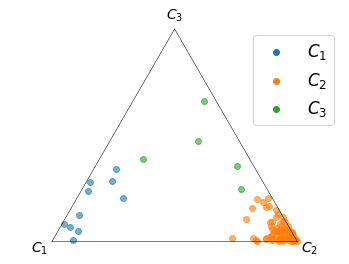

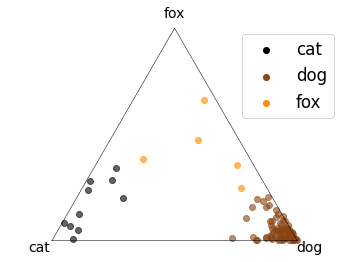

In [4]:
"""
====================================================
Scatter plot of ternary problem in the simplex space
====================================================

This example illustrates how to draw samples from the scores of a model and
their true label.
"""
# Author: Miquel Perello Nieto <miquel.perellonieto@bristol.ac.uk>
# License: new BSD
## updated by Jordy Van Landeghem <first@contract.fit>

from matplotlib import pyplot as plt
print(__doc__)
SAVEFIGS=True

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['font.size'] = 14.0
#mpl.rcParams['font.family'] = 'serif'
#mpl.rcParams['font.serif'] = 'Times New Roman'
#mpl.rcParams['text.usetex'] = False
# mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath} \usepackage{newtxmath}'
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'large'
mpl.rcParams['axes.titlesize'] = 'large'
mpl.rcParams['axes.labelsize'] = 'large'
mpl.rcParams['xtick.labelsize'] = 'large'
mpl.rcParams['ytick.labelsize'] = 'large'
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.pad_inches'] = 0.1
mpl.rcParams['savefig.transparent'] = True
#mpl.rcParams['savefig.format'] = 'pdf'
#mpl.rcParams['savefig.frameon'] = False
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['xtick.major.size'] = 5

##############################################################################
# We generate 3 scores as comming from 3 Dirichlet distributions simulating the
# output scores of a classifier. Then we show how to draw the samples in the
# simplex space.

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)

n_c1 = n_c2 = n_c3 = 33 #balanced
n_c1 = 10; n_c2 = 85; n_c3 = 5 #imbalanced
p = np.concatenate((np.random.dirichlet([6, 2, 3], n_c1),
                    np.random.dirichlet([5, 12, 5], n_c2),
                    np.random.dirichlet([2, 3, 5], n_c3)
                   ))

# imbalanced
p = np.concatenate((np.random.dirichlet([8, 1, 2], n_c1),
                    np.random.dirichlet([1, 20, 1], n_c2),
                    np.random.dirichlet([1.5, 3, 5], n_c3)
                   ))

# we could generate values such as from https://arxiv.org/pdf/2107.03342.pdf 
# a: low uncertainty (10,10, 100)
# b: high uncertainty (50,50,50)
#c: out-of-distribution (1.5, 1.5, 1.5)
## desired behaviors of a Dirichlet distribution over categorical distributions.
'''
In (a) the sharp Dirichlet distribution
with its expectation close to the upper node represents a
certain prediction of a categorical distribution. In (b) the sharp
Dirichlet distribution in the center of the simplex represents
high data uncertainty but low distributional uncertainty. In
(c) the flat Dirichlet distribution indicates high distributional
uncertainty
'''

y = np.concatenate((np.zeros(n_c1), np.ones(n_c2), np.ones(n_c3)*2))

from pycalib.visualisations.ternary import draw_tri_samples

fig, ax = draw_tri_samples(p, classes=y, alpha=0.6)

if SAVEFIGS:
    fig.savefig('fig1.png')

##############################################################################
# Here we specify the names of each class and change their colors.

fig, ax = draw_tri_samples(p, classes=y, alpha=0.6,
                           labels=['cat', 'dog', 'fox'],
                           color_list=['black','saddlebrown', 'darkorange'])

if SAVEFIGS:
    fig.savefig('ternary_clf.png')

import pickle

#dump p and y
with open('ternary_clf.pkl', 'wb') as f:
    pickle.dump([p,y], f)

plt.show()

In [6]:
# accuracy of this model
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(p, axis=1)
print("accuracy:", accuracy_score(y, y_pred))
print("confusion matrix:\n", confusion_matrix(y, y_pred))

accuracy: 0.97
confusion matrix:
 [[10  0  0]
 [ 0 85  0]
 [ 1  2  2]]


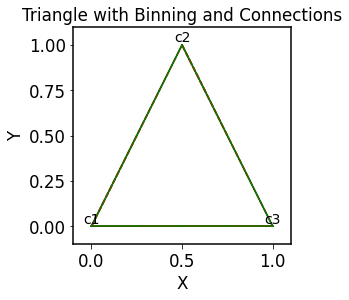

In [10]:
import matplotlib.pyplot as plt
import numpy as np


def plot_triangle_bins_connections():
    # Define the corners of the triangle
    corners = np.array([[0, 0], [0.5, 1], [1, 0]])
    corner_labels = ["c1", "c2", "c3"]

    # Define the binning levels
    bin_levels = [0, 0.25, 0.5, 0.75, 1]

    # Plot the triangle
    plt.figure()
    plt.gca().set_aspect("equal")
    plt.triplot(corners[:, 0], corners[:, 1], "k-")

    # Plot the corner labels
    for i in range(3):
        plt.text(
            corners[i, 0], corners[i, 1], corner_labels[i], horizontalalignment="center", verticalalignment="bottom"
        )

    # Perform binning on the edges
    bin_points = []
    for i in range(3):
        start = corners[i]
        end = corners[(i + 1) % 3]
        for level in bin_levels:
            bin_point = start + level * (end - start)
            bin_points.append(bin_point)
            plt.plot([start[0], bin_point[0]], [start[1], bin_point[1]], "r--")

    # Connect the binning lines between surfaces
    for i in range(len(bin_points)):
        start = bin_points[i]
        end = bin_points[(i + 1) % len(bin_points)]
        plt.plot([start[0], end[0]], [start[1], end[1]], "g-")

    # Set the x and y limits
    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)

    # Set the axis labels and title
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Triangle with Binning and Connections")

    # Show the plot
    plt.show()


# Call the function to generate the triangle plot with binning and connections
plot_triangle_bins_connections()

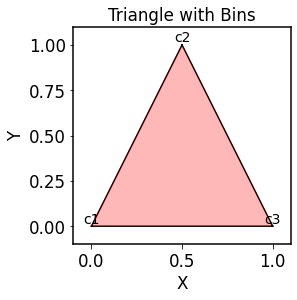

In [27]:
import matplotlib.pyplot as plt
import numpy as np

def plot_triangle_with_bins():
    # Define the corners of the main triangle
    corners = np.array([[0, 0], [0.5, 1], [1, 0]])
    corner_labels = ['c1', 'c2', 'c3']

    # Define the number of bins
    num_bins = 4

    # Plot the main triangle
    plt.figure()
    plt.gca().set_aspect('equal')
    plt.triplot(corners[:, 0], corners[:, 1], 'k-')metrics

    # Plot the corner labels
    for i in range(3):
        plt.text(corners[i, 0], corners[i, 1], corner_labels[i],
                 horizontalalignment='center', verticalalignment='bottom')

    # Compute the vertices of the smaller triangles (bins)
    bin_vertices = []
    for i in range(1, num_bins):
        for j in range(i):
            start = corners[0] + (corners[1] - corners[0]) * (j / i)
            end = corners[0] + (corners[1] - corners[0]) * ((j + 1) / i)
            bin_vertices.append([start, end, corners[2]])

    # Plot the smaller triangles (bins)
    for vertices in bin_vertices:
        plt.fill([vertices[0][0], vertices[1][0], vertices[2][0]],
                 [vertices[0][1], vertices[1][1], vertices[2][1]], 'r', alpha=0.1)

    # Set the x and y limits
    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)

    # Set the axis labels and title
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Triangle with Bins')

    # Show the plot
    plt.show()

# Call the function to generate the triangle plot with bins
plot_triangle_with_bins()


    FILE_PATH = sys.argv[1] if len(sys.argv) > 1 else "resnet110_c10_logits.p"
    (p_val, y_val), (p_test, y_test) = unpickle_probs(FILE_PATH, False, True)

[[array([0., 0.]), array([0.125, 0.25 ]), array([0.25, 0.  ])], [array([0.25, 0.  ]), array([0.375, 0.25 ]), array([0.5, 0. ])], [array([0.375, 0.25 ]), array([0.5, 0.5]), array([0.625, 0.25 ])], [array([0.5, 0. ]), array([0.625, 0.25 ]), array([0.75, 0.  ])], [array([0.625, 0.25 ]), array([0.75, 0.5 ]), array([0.875, 0.25 ])], [array([0.75, 0.5 ]), array([0.875, 0.75 ]), array([1. , 0.5])], [array([0.75, 0.  ]), array([0.875, 0.25 ]), array([1., 0.])], [array([0.875, 0.25 ]), array([1. , 0.5]), array([1.125, 0.25 ])], [array([1. , 0.5]), array([1.125, 0.75 ]), array([1.25, 0.5 ])], [array([1.125, 0.75 ]), array([1.25, 1.  ]), array([1.375, 0.75 ])], [array([1., 0.]), array([1.125, 0.25 ]), array([1.25, 0.  ])], [array([1.125, 0.25 ]), array([1.25, 0.5 ]), array([1.375, 0.25 ])], [array([1.25, 0.5 ]), array([1.375, 0.75 ]), array([1.5, 0.5])], [array([1.375, 0.75 ]), array([1.5, 1. ]), array([1.625, 0.75 ])], [array([1.5, 1. ]), array([1.625, 1.25 ]), array([1.75, 1.  ])]]


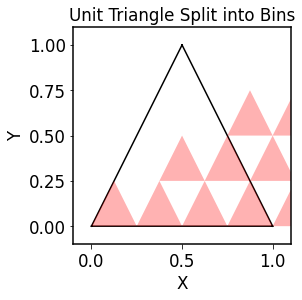

In [25]:
import matplotlib.pyplot as plt
import numpy as np


def split_triangle_into_bins():
    # Define the corners of the unit triangle
    corners = np.array([[0, 0], [0.5, 1], [1, 0]])

    # Define the number of bins per side
    num_bins = 4

    # Compute the vertices of the smaller triangles (bins)
    bin_vertices = []
    for i in range(num_bins + 1):
        for j in range(i + 1):
            start = corners[0] + (corners[1] - corners[0]) * (j / num_bins) + (corners[2] - corners[0]) * (i / num_bins)
            end1 = (
                corners[0]
                + (corners[1] - corners[0]) * ((j + 1) / num_bins)
                + (corners[2] - corners[0]) * (i / num_bins)
            )
            end2 = (
                corners[0]
                + (corners[1] - corners[0]) * (j / num_bins)
                + (corners[2] - corners[0]) * ((i + 1) / num_bins)
            )
            bin_vertices.append([start, end1, end2])

    print(bin_vertices)

    # Plot the unit triangle and smaller triangles (bins)
    plt.figure()
    plt.gca().set_aspect("equal")
    plt.triplot(corners[:, 0], corners[:, 1], "k-")

    for vertices in bin_vertices:
        plt.fill(
            [vertices[0][0], vertices[1][0], vertices[2][0]],
            [vertices[0][1], vertices[1][1], vertices[2][1]],
            "r",
            alpha=0.3,
        )

    # Set the x and y limits
    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1 + 0.1)

    # Set the axis labels and title
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Unit Triangle Split into Bins")

    # Show the plot
    plt.show()


# Call the function to split the unit triangle into 16 bins
split_triangle_into_bins()

# Confidence estimation NER
## Marginal distribution of confidence per token

In [ ]:
import torch
import numpy as np
from transformers import AutoTokenizer, AutoModelForTokenClassification

tokenizer = AutoTokenizer.from_pretrained("kamalkraj/bert-base-cased-ner-conll2003")
model = AutoModelForTokenClassification.from_pretrained("kamalkraj/bert-base-cased-ner-conll2003")

sample = "Hal Jordan was the best Green Lantern ever".split()

inputs = tokenizer.encode_plus(sample, is_split_into_words=True)
prediction_masks = inputs.word_ids()

inputs = {k: torch.tensor([v]) for k, v in inputs.items()}
outputs = model(**inputs)
logits = outputs.logits.detach().numpy()[0]
word_logits = []
words = np.unique([mask if mask is not None else -100 for mask in prediction_masks])[1:]  # skip special start token
for word in words:  # for each word spread over multiple subwords, obtain a word confidence
    word_idx = (prediction_masks == word).nonzero()[0]
    word_logits.append(logits[word_idx[0]])
word_logits = torch.Tensor(np.array(word_logits))
marginal_distribution = torch.nn.functional.softmax(word_logits, dim=-1)  # marginal distribution
marg_p, MAP_y = marginal_distribution.max(-1)  # posterior decoding